# Python code for Linear Regression training

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

Download and view the advertising dataset from Keith's Github.

In [2]:
url = "https://raw.githubusercontent.com/keithmcnulty/linear_regression_training/master/advertising.csv"
advertising = pd.read_csv(url)
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Look at TV versus sales to confirm likely linear relationship.

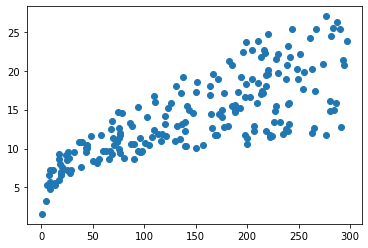

In [3]:
scplot = plt.scatter(x = "TV", y = "Sales", data = advertising)

Create a ols (ordinary least squares) linear regression model and regress Sales against TV.

In [4]:
TVmodel = smf.ols(formula = 'Sales ~ TV', data = advertising).fit()

View the coefficients

In [5]:
params = TVmodel.params
params

Intercept    7.032594
TV           0.047537
dtype: float64

Plot the straight line onto the scatter.

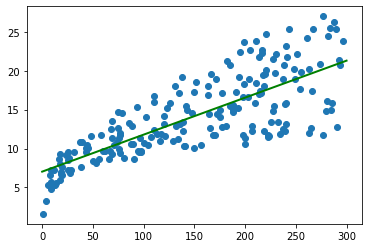

In [6]:
plt.figure()
x = np.linspace(0, 300, 50)
plt.scatter(x = "TV", y = "Sales", data = advertising)
plt.plot(x, params[0] + params[1]*x, 'g', lw = 2)

Run a model on all inputs and get full summary: coefficients, conf intervals, p-vals, r-squared, etc.

In [7]:
fullmodel = smf.ols(formula = 'Sales ~ TV + Radio + Newspaper', data = advertising).fit()
fullmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.58e-96
Time:                        18:42:02   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Similar for interaction terms.

In [8]:
model_interact = smf.ols(formula = 'Sales ~ TV + Radio + TV:Radio', data = advertising).fit()
model_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          6.68e-146
Time:                        18:42:02   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note that statsmodels in Python gives a proactive warning for possible multicollinearity.

Now we will grab a random row and hold it for testing.

In [9]:
import random
grab_row = random.sample(range(200), 1)
advertising_fit = advertising.drop(grab_row, axis = 0)
advertising_test = advertising.iloc[grab_row]

Now fit on the 199 rows.

In [10]:
model = smf.ols(formula = 'Sales ~ TV + Radio + TV:Radio', data = advertising_fit).fit()

Now make a prediction and compare it to the real value.

In [11]:
test = pd.DataFrame(dict(prediction = model.predict(advertising_test.drop('Sales', axis = 1)), 
                         actual = advertising_test['Sales']))
test

,prediction,actual
20,18.296906,18.0


Other resources:

1. [Calculating confidence and prediction intervals for predictions](https://www.thetopsites.net/article/52282464.shtml)

2. [Multicollinearity testing](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/)